In [1]:
import pandas as pd

df = pd.read_csv('./dataset/diabetes.csv')
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

X=df.drop("Outcome", axis=1)
y=df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
X_train.shape

(7630, 16)

In [ ]:
# pip uninstall tensorflow

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

#model define
# keras --> model --> ANN --> 3 layer --> first input layer --> 2nd hidden layer --> output layer --> binary classification

model = keras.Sequential(
    [
        layers.Dense(16, activation='relu',input_shape=(X_train.shape[1],)), #input layer
        layers.Dense(8, activation='relu'), #hidden layer
        layers.Dense(1, activation='sigmoid') #binary classification
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# binary classification --> final layer activation function --> sigmoid --> use binary crossentropy loss function
# multi label classification --> final layer activation function --> softmax --> use categorical cross entropy loss function or 
# sparse cross entropy

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.6698 - loss: 0.6665 - val_accuracy: 0.9587 - val_loss: 0.2089
Epoch 2/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.9626 - loss: 0.1507 - val_accuracy: 0.9771 - val_loss: 0.0767
Epoch 3/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9783 - loss: 0.0664 - val_accuracy: 0.9803 - val_loss: 0.0512
Epoch 4/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9866 - loss: 0.0435 - val_accuracy: 0.9843 - val_loss: 0.0404
Epoch 5/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9849 - loss: 0.0378 - val_accuracy: 0.9869 - val_loss: 0.0321
Epoch 6/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9879 - loss: 0.0341 - val_accuracy: 0.9875 - val_loss: 0.0283
Epoch 7/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9898 - loss: 0.0272 - val_accuracy: 0.9908 - val_loss: 0.0257
Epoch 8/20
382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9943 - loss: 0.0221 - 

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test accuracy: ", test_accuracy)
print("Test loss: ", test_loss)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9957 - loss: 0.0101
Test accuracy:  0.9947589039802551
Test loss:  0.013981715776026249


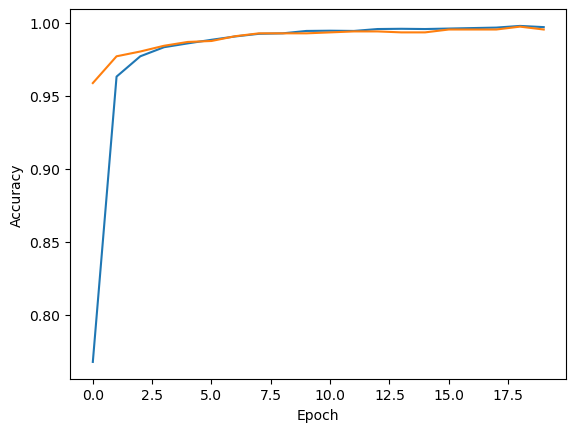

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [12]:
# model save = model persistancy

import pickle
with open("diabetic-prediction-model.pkl", "wb") as f:
    pickle.dump((model, scaler), f)

# Inference

In [13]:
with open("diabetic-prediction-model.pkl", "rb") as f:
    model, scaler = pickle.load(f)

In [14]:
sample = X_test[1].reshape(1,-1) #reshape adds extra dimension

In [16]:
prediction = model.predict(sample)[0][0] #returns tensor(metrics), 0 index ko 0 value

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [17]:
prediction

1.0

In [21]:
diabetes_threshold = 0.5 # if greater than 0.5 then sample is diabetic sample

In [22]:
if prediction > diabetes_threshold:
    print("The sample is of diabetic patient.")
else:
    print("The choice of having diabetic is very low.")

The sample is of diabetic patient.


In [ ]:
#